In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform

데이터 불러오기 & 출력

In [61]:
bike_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sampleSubmission.csv')

print("Train data shape:", bike_df.shape)
print("Test data shape:", test_df.shape)
print("Sample Submission shape:", sampleSubmission.shape)

Train data shape: (10886, 12)
Test data shape: (6493, 9)
Sample Submission shape: (6493, 2)


DataFrame의 구조 및 메모리 사용량 

In [62]:
print("\nTrain data info:")
bike_df.info()


Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


datetime 형태로 변경
- 시간의 다양성 활용
- 데이터 분석 효율성 활용
- 데이터 일관성 유지

In [ ]:

bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

결측치 확인
- 데이터 분석 결과 신뢰성의 확보
- 모델 성능 향상
- 데이터의 특성 파악
- 데이터 전처리 수립

In [ ]:

print("\nMissing values in train data:")
print(bike_df.isnull().sum())


Missing values in train data:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


통계 정보 확인
- 데이터의 전반적인 특성 파악3
- 데이터 품질 평가
- 데이터 전처리 방향 설정
- 모델 성능 향상

In [84]:

print("\nTrain data description:")
print(bike_df.describe())


Train data description:
                            datetime        season       holiday  \
count                          10368  10368.000000  10368.000000   
mean   2011-12-23 02:47:55.347222016      2.514564      0.029225   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-06-19 21:45:00      2.000000      0.000000   
50%              2011-12-15 01:30:00      3.000000      0.000000   
75%              2012-06-17 08:15:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.118769      0.168443   

         workingday       weather          temp         atemp      humidity  \
count  10368.000000  10368.000000  10368.000000  10368.000000  10368.000000   
mean       0.676022      1.421103     20.105343     23.541924     62.495949   
min        0.000000      1.000000      0.820000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000

시각화
- 첫 번째 서브플롯 (axes[0, 0]): 막대 그래프 (Bar plot)
  - 내용: 계절(season)별 자전거 대여량(count)의 평균을 비교
  - 특징: hue 매개변수를 사용하여 각 막대를 계절별로 색상으로 구분 
- 두 번째 서브플롯 (axes[0, 1]): 산점도 (Scatter plot)
  - 내용: 온도(temp)와 자전거 대여량(count)의 관계
  - 특징: 온도 변화에 따른 자전거 대여량의 변화를 시각적
- 세 번째 서브플롯 (axes[1, 0]): 산점도 (Scatter plot)
  - 내용: 체감 온도(atemp)와 자전거 대여량(count)의 관계
  - 특징: 체감 온도 변화에 따른 자전거 대여량의 변화를 시각적.
- 네 번째 서브플롯 (axes[1, 1]): 산점도 (Scatter plot)
  - 내용: 풍속(windspeed)과 자전거 대여량(count)의 관계
  - 특징: 풍속 변화에 따른 자전거 대여량의 변화를 시각적

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


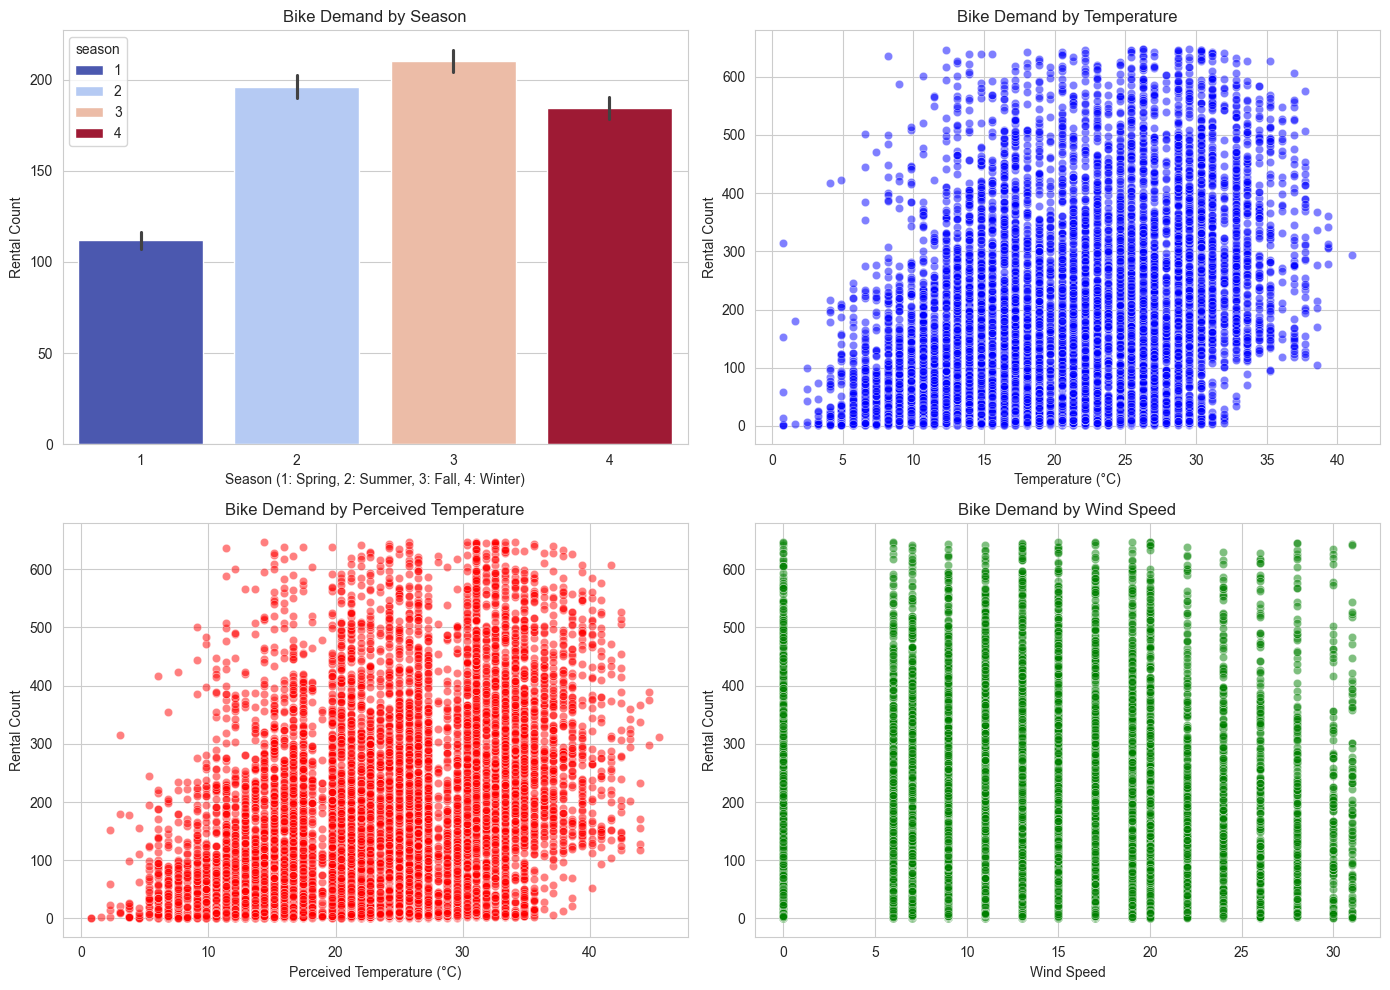

In [85]:

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x="season", y="count", data=bike_df, ax=axes[0, 0], hue="season", palette="coolwarm")
axes[0, 0].set_title("Bike Demand by Season")
axes[0, 0].set_xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
axes[0, 0].set_ylabel("Rental Count")

sns.scatterplot(x="temp", y="count", data=bike_df, ax=axes[0, 1], alpha=0.5, color="blue")
axes[0, 1].set_title("Bike Demand by Temperature")
axes[0, 1].set_xlabel("Temperature (°C)")
axes[0, 1].set_ylabel("Rental Count")

sns.scatterplot(x="atemp", y="count", data=bike_df, ax=axes[1, 0], alpha=0.5, color="red")
axes[1, 0].set_title("Bike Demand by Perceived Temperature")
axes[1, 0].set_xlabel("Perceived Temperature (°C)")
axes[1, 0].set_ylabel("Rental Count")

sns.scatterplot(x="windspeed", y="count", data=bike_df, ax=axes[1, 1], alpha=0.5, color="green")
axes[1, 1].set_title("Bike Demand by Wind Speed")
axes[1, 1].set_xlabel("Wind Speed")
axes[1, 1].set_ylabel("Rental Count")

plt.tight_layout()
plt.show()

년-월 컬럼 생성
- 시간 기반 데이터 분석의 용의성
- 시계열 데이터 시각화
- 머신러닝 모델의 성능 향상
- 데이터 관리 및 필터링

In [ ]:

def con_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

bike_df["year_month"] = bike_df["datetime"].apply(con_year_month)
test_df["year_month"] = test_df["datetime"].apply(con_year_month)

월별 데이터 분석
- 봄에 자전거 대여량이 많을줄 알았는데 겨울이 높게 나와서 이상해서 월별 분석 함

In [ ]:

bike_df['month'] = pd.to_datetime(bike_df['datetime']).dt.month
print("\nSeason vs Month:")
print(pd.crosstab(bike_df['season'], bike_df['month']))


Season vs Month:
month    1    2    3    4    5    6    7    8    9    10   11   12
season                                                            
1       884  901  901    0    0    0    0    0    0    0    0    0
2         0    0    0  909  912  912    0    0    0    0    0    0
3         0    0    0    0    0    0  912  912  909    0    0    0
4         0    0    0    0    0    0    0    0    0  911  911  912


예측 vs 실제 시각화

- 첫 번째 서브플롯 (axes[0, 0]): 막대 그래프 (Bar plot)
  - 내용: 계절(season)별 자전거 대여량(count)의 평균을 비교
  - 특징: hue 매개변수를 사용하여 각 막대를 계절별로 색상으로 구분합니다. palette를 사용하여 색상을 지정

- 두 번째 서브플롯 (axes[0, 1]): 히스토그램 (Histogram)
  - 내용: 자전거 대여량(count)의 분포
  - 특징: bins 매개변수로 히스토그램의 막대 개수를 설정하고, kde 매개변수로 커널 밀도 추정 그래프를 추가

- 세 번째 서브플롯 (axes[1, 0]): 산점도 (Scatter plot)
  - 내용: 실제 자전거 대여량(count)과 코드에서 임의로 생성한 예측 대여량(predicted_count)의 관계
  - 특징: 대각선(빨간색 점선)을 그려 예측값과 실제값이 얼마나 일치하는지 시각적으로 비교

- 네 번째 서브플롯 (axes[1, 1]): 히트맵 (Heatmap)
  - 내용: season, weather, temp, count, atemp, windspeed 열들 간의 상관관계 행렬을 시각화
  - 특징: annot 매개변수로 각 셀에 상관계수 값을 표시하고, cmap 매개변수로 색상 맵을 설정

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
locator: <matplotlib.ticker.AutoLocator object at 0x000002704EF1E2A0>


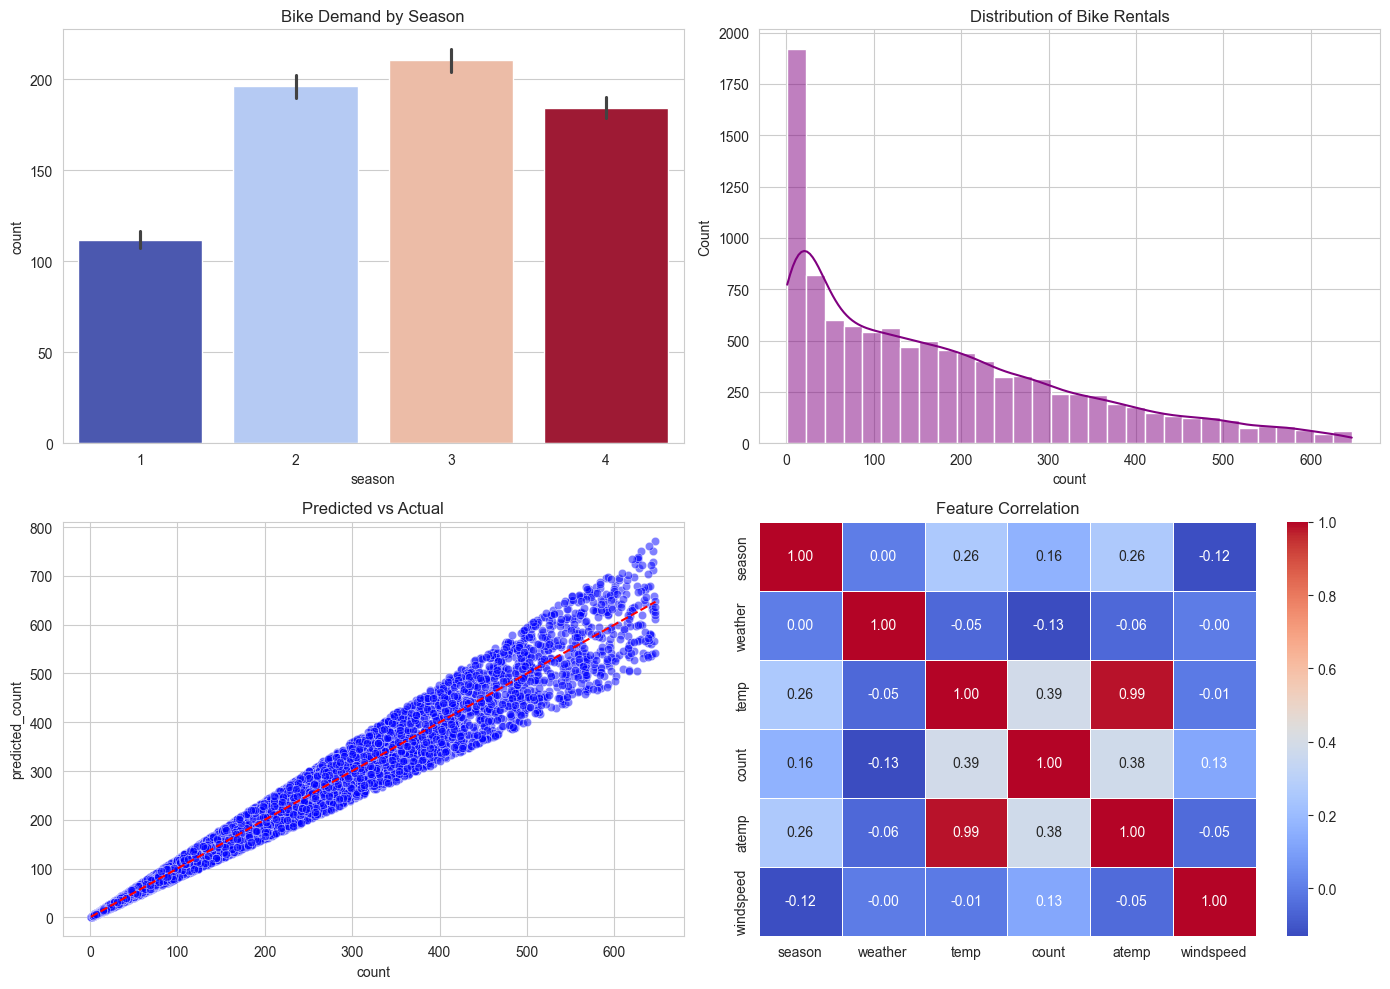

In [83]:

np.random.seed(42)
bike_df["predicted_count"] = bike_df["count"] * np.random.uniform(0.8, 1.2, size=len(bike_df))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.barplot(x="season", y="count", hue="season", data=bike_df, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Bike Demand by Season")
axes[0, 0].legend().set_visible(False)

sns.histplot(bike_df["count"], bins=30, kde=True, color="purple", ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Bike Rentals")

sns.scatterplot(x=bike_df["count"], y=bike_df["predicted_count"], alpha=0.5, color="blue", ax=axes[1, 0])
axes[1, 0].plot([bike_df["count"].min(), bike_df["count"].max()], [bike_df["count"].min(), bike_df["count"].max()], color="red", linestyle="--")
axes[1, 0].set_title("Predicted vs Actual")

corr_matrix = bike_df[['season', 'weather', 'temp', 'count', 'atemp', 'windspeed']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation")

plt.tight_layout()
plt.show()

시간대 날씨 & 계절이 자전거 대여량

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


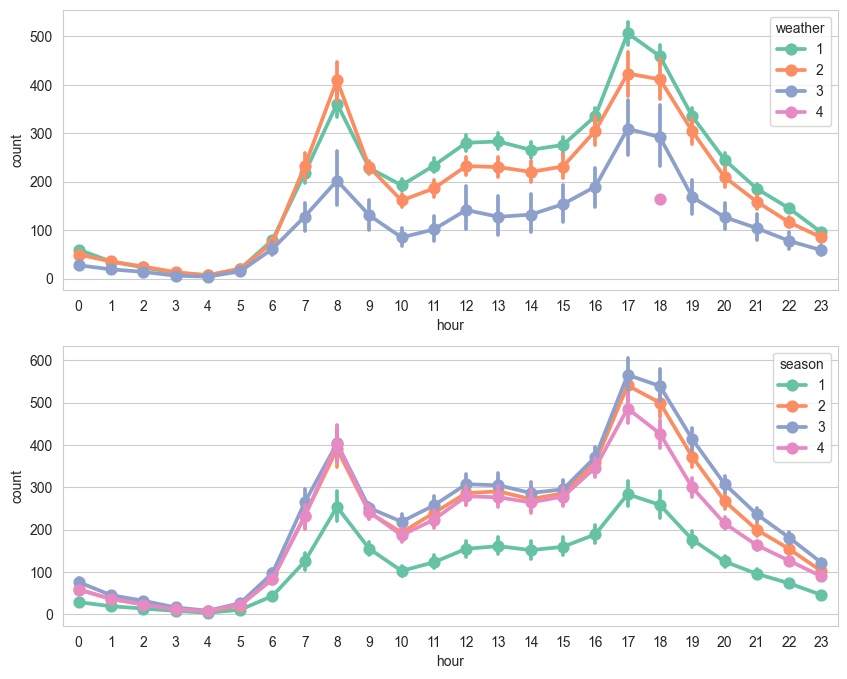

In [ ]:


bike_df['hour'] = pd.to_datetime(bike_df['datetime']).dt.hour
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.pointplot(x='hour', y='count', hue='weather', data=bike_df, ax=axes[0], palette="Set2")
sns.pointplot(x='hour', y='count', hue='season', data=bike_df, ax=axes[1], palette="Set2")
plt.show()

이상치 제거
- 분석 결과의 신뢰성 확보
- 모델 성능 향상
- 데이터의 특성 파악
- 데이터 전처리 전략 수립

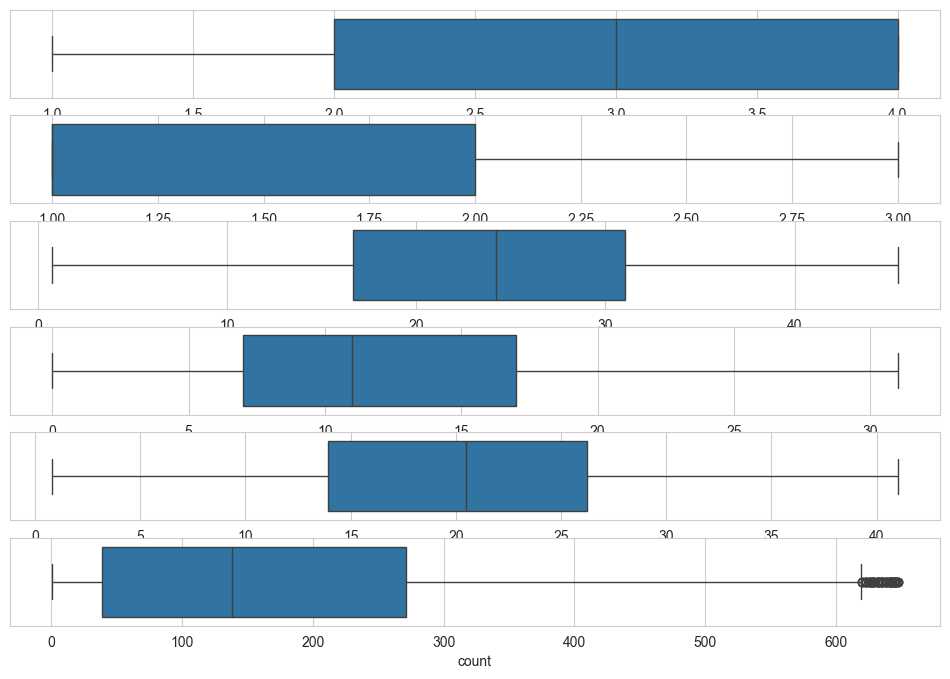

In [ ]:

Q1 = bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']].quantile(0.25)
Q3 = bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']].quantile(0.75)
IQR = Q3 - Q1
bike_df = bike_df[~((bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']] < (Q1 - 1.5 * IQR)) | (bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']] > (Q3 + 1.5 * IQR))).any(axis=1)]

fig, axes = plt.subplots(6, 1, figsize=(12, 8))
sns.boxplot(data=bike_df, x="season", ax=axes[0])
sns.boxplot(data=bike_df, x="weather", ax=axes[1])
sns.boxplot(data=bike_df, x="atemp", ax=axes[2])
sns.boxplot(data=bike_df, x="windspeed", ax=axes[3])
sns.boxplot(data=bike_df, x="temp", ax=axes[4])
sns.boxplot(data=bike_df, x="count", ax=axes[5])
plt.show()


특성과 타겟 변수 정의

In [ ]:
X = bike_df[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']]
y = bike_df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest 모델 튜닝 및 학습

모델 튜닝의 이유
 - 성능향상
 - 과적합 방지
 - 일반화 성능 향상


모델 학습의 이유
- 데이터 패턴 학습
- 예측 수행
- 의사 결정 지원


랜덤 포레스트 모델 튜닝의 주요 하이퍼파라미터
- n_estimators
- max_depth
- min_samples_split
- max_features

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_param_dist = {'n_estimators': randint(50, 200), 'max_depth': randint(3, 20), 'min_samples_split': randint(2, 20), 'min_samples_leaf': randint(1, 20), 'max_features': ['sqrt', 'log2', None]}
rf_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)
print("\nBest parameters:", rf_search.best_params_)
y_pred_rf = rf_search.best_estimator_.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest RMSE: {rmse_rf:.4f}")


Best parameters: {'max_depth': 19, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 165}
Random Forest RMSE: 88.2507


특성 엔지니어링(Feature engineering for test data)
- 모델 일관성 유지
- 모델 성능 향상
- 데이터 적합성 확보


특성 엔지니어링의 단계
- 학습 데이터 특성 분석
- 테스트 데이터 전처리
- 특성 생성및 변환
- 특성 선택

In [ ]:

test_df['hour'] = pd.to_datetime(test_df['datetime']).dt.hour
test_df['month'] = pd.to_datetime(test_df['datetime']).dt.month
test_df['weekday'] = pd.to_datetime(test_df['datetime']).dt.weekday

모델 학습에 사용된 특성과 동일한 특성 사용하여 예측(Use the same features as training)
- 모델 일관성 유지
- 예측 정확도 향상
- 데이터 일관성 유지
- 모델 안정성 확보

동일한 특성 사용
- 특성 목록 확인
- 데이터 전처리
   - 결측치처리
   - 범주형 변수 인코딩
   - 수치형변수 스케일링
   - 특성 선택 또는 생성
- 특성 추출
- 모델 예측

In [ ]:
X_test_final = test_df[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour']]

머신러닝 모델 사용하여 예측(Predict using the best model)

1. 복잡한 패턴 학습 및 예측
2. 자동화 및 효율성 향상
3. 데이터 기반 의사 결정 지원
4. 다양한 분야에서의 활용 (금융, 의료, 마케팅, 제조, 자율 주행 등 )
5. 지속적인 성능 향상

In [ ]:
test_df['count'] = rf_search.best_estimator_.predict(X_test_final)

위의 코딩으로 아래 keggle 제출용 파일 만드는 법  위의 코딩을 그대로 keggle에 제출하면 오류가 뜸

In [76]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# 데이터 로드
bike_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# datetime 형태로 변경
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# 이상치 처리 (IQR 방법을 사용하여 이상치를 제거)
Q1 = bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']].quantile(0.25)
Q3 = bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']].quantile(0.75)
IQR = Q3 - Q1

bike_df = bike_df[~((bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']] < (Q1 - 1.5 * IQR)) |
                    (bike_df[['season', 'weather', 'atemp', 'windspeed', 'count', 'temp']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature engineering
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['weekday'] = bike_df['datetime'].dt.weekday
bike_df['dayofyear'] = bike_df['datetime'].dt.dayofyear
bike_df['weekend'] = (bike_df['weekday'] >= 5).astype(int)
bike_df['temp_humidity'] = bike_df['temp'] * bike_df['humidity']

test_df['hour'] = test_df['datetime'].dt.hour
test_df['month'] = test_df['datetime'].dt.month
test_df['weekday'] = test_df['datetime'].dt.weekday
test_df['dayofyear'] = test_df['datetime'].dt.dayofyear
test_df['weekend'] = (test_df['weekday'] >= 5).astype(int)
test_df['temp_humidity'] = test_df['temp'] * test_df['humidity']

# 사용할 변수 선택
features = ['hour', 'month', 'weekday', 'dayofyear', 'weekend', 'temp', 'humidity', 'windspeed', 'temp_humidity']
X_train = bike_df[features]
y_train = bike_df['count']

# 랜덤 포레스트 모델 튜닝
rf_model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}
rf_search = RandomizedSearchCV(rf_model, param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

# 예측
X_test = test_df[features]
test_df['count'] = rf_search.best_estimator_.predict(X_test)

# 음수 예측값 처리 및 정수 변환
test_df['count'] = test_df['count'].apply(lambda x: 0 if x < 0 else x).astype(int)

# 제출 파일 생성
submission = test_df[['datetime', 'count']].copy()
submission['datetime'] = submission['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
submission.to_csv('submission.csv', index=False)

keggle 결과

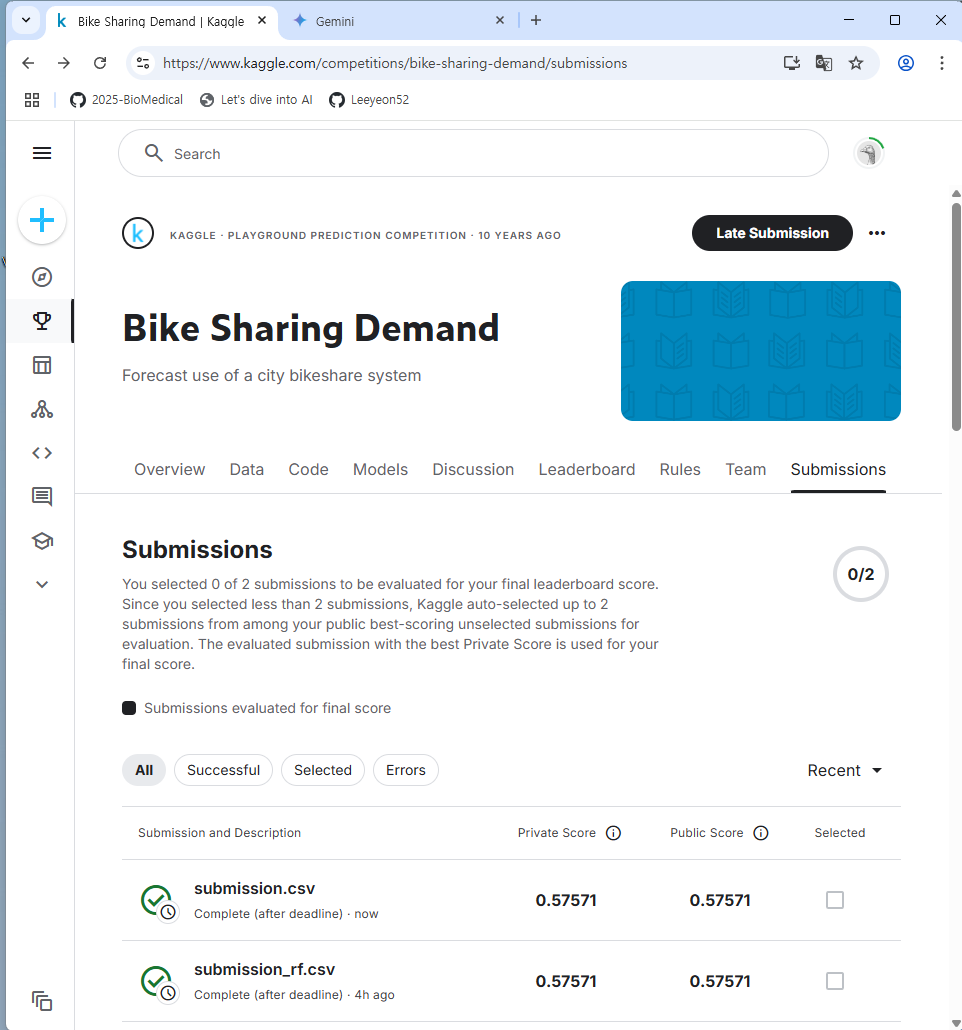

In [92]:
from IPython.display import Image,display
img = r"C:\Users\302-15\Desktop\새 폴더 (4)\스크린샷 2025-03-28 164727.png"

display(Image(filename=img))